## Create confusion matrix per patient on validation dataset

1. Export existing model into the `.pkl` file.
2. Make inference on all images from the `valid` set, keep predictions<br>in the dictionary `predictions`(\<filename\>:\<prediction\>)
3. Look for keys in the dictionary corresponding to current patient,<br>count predictions of all classes, calculate argmax => prediction of class for the patient.

Confusion matrix for whole slices.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# code for being able import from module which is in the parent directory
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from fastai.vision import *
from fastai.metrics import error_rate
import pathlib
from timeit import default_timer as timer
from sklearn.metrics import confusion_matrix

from tools import plot_confusion_matrix_for_patients

In [3]:
bs = 512

In [4]:
path = pathlib.PosixPath("/storage_1/dataset_classification_threshold_45/")

In [5]:
tfms = get_transforms(flip_vert=True, do_flip=True, p_affine=0., p_lighting=0., max_zoom=1.)
data = ImageDataBunch.from_folder(path=path, train='train', valid='valid',
                                  ds_tfms=tfms, size=224).normalize(imagenet_stats)

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate).load("stage-2-off-tfms-resnet50-ep8")

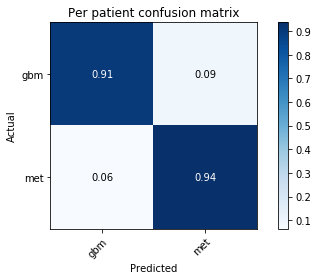

In [7]:
plot_confusion_matrix_for_patients(data, learn)

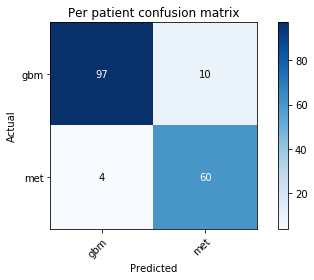

In [7]:
plot_confusion_matrix_for_patients(data, learn, normalize=False)